## Numpy3 : 비교 연산과 데이터 추출

In [1]:
import numpy as np

---

### 1.비교 연산
넘파이의 비교 연산은 크게 배열 내에서의 비교 연산과 배열 간의 비교 연산이 있다. 이러한 비교 연산들의 결과는 항상 참/거짓을 나타내는 **불린형(boolean type)** 을 가진 배열로 추출된다.

#### 1-1. 브로드캐스팅 비교 연산
첫 번째 비교 연산은 앞서 봤던 브로드캐스팅 연산이다. 기존 벡터-스칼라 연산과 마찬가지로 하나의 스칼라 값과 벡터 간의 비교 연산은 벡터 내의 전체 요소에 해당 연산이 적용된다.  
다음 코드를 보면 벡터 x에 대해 **>3** 연산을 적용하면 다음과 같이 각 요소에 모두 해당 연산이 적용되어 불린형을 가진 배열이 출력된다. 이것으로 브로드캐스팅 연산이 전반적으로 적용되는 것을 확인할 수 있다.

In [2]:
x=np.array([4,3,2,6,8,5])
print(x>3)

[ True False False  True  True  True]


#### 1-2. 요소별 비교 연산  
두 번째 비교 연산으로 두 개의 배열 간 구조(shape)가 동일한 경우 요소별 비교 연산이 가능하다. 쉬운 개념이니 예제 하나 보고 넘어간다.

In [4]:
x=np.array([1,3,0])
y=np.array([2,1,7])
print(x>y)

[False  True False]


---

### 2.비교 연산 함수  
넘파이는 기본적인 두 가지 비교 연산 외에도 True 또는 False를 반환하는 다양한 함수를 제공한다.

#### 2-1.all과 any  
**all**과 **any**는 파이썬의 기본 리스트에도 존재하는 함수로 배열 내부의 모든 값이 참인지 거짓인지에 따라 반환값이 달라진다.
| 함수 | 설명 |
| ----| ---- |
| all | 배열 내부 모든 값이 참일 때 True |
| any | 배열 내부 하나라도 참일 때 True |

In [11]:
x=np.array([4,6,7,3,2])

In [8]:
##all
print((x>3).all())
print((x<10).all())

False
True


In [10]:
##any
print((x>3).any())
print((x>10).any())

True
False


#### 2-2.인덱스 반환 함수
비교 함수에는 어떤 특정한 조건에 맞는 인덱스를 반환하는 함수인 **where**함수가 있다. where함수는 배열이 불린형으로 이루어졌을 때 참값인 인덱스를 반환한다.

In [12]:
x=np.array([4,6,7,3,2])
print(x>5)

[False  True  True False False]


In [13]:
np.where(x>5)

(array([1, 2], dtype=int64),)

np.where 함수를 사용하면 참인 경우와 거짓인 경우의 값을 매칭해주는 값을 지정할 수 있다  
**np.where(조건, true매칭값, False 매칭값)**

In [16]:
x=np.array([4,6,7,3,2])
print(np.where(x>5,10,20))

[20 10 10 20 20]


#### 2-3.정렬된 값의 인덱스를 반환해주는 함수
비교 연산 중 하나의 배열 내에서 정렬된 값의 인덱스를 반환해주는 함수들이 있다.
| 함수 | 설명 |
| ----| ---- |
|argsort|배열 내에 있는 값들을 작은 순서대로 인덱스를 반환 |
|argmax |배열 내에 있는 값들 중 최대값의 인덱스를 반환 |
|argmin |배열 내에 있는 값들 중 최소값의 인덱스를 반환 |

In [21]:
x=np.array([4,6,7,3,2])
print(np.argsort(x))
print(np.argmax(x))
print(np.argmin(x))

[4 3 0 1 2]
2
4


---

### 3.인덱스를 활용한 데이터 추출  
비교 연산과 인덱스 추출 함수를 활용하면 필요에 따라 데이터를 추출할 수 있다. 대표적인 기법으로 **불린 인덱스**(boolean index)와 **팬시 인덱스**(fancy index)가 있다.

#### 3-1.불린 인덱스
불린 인덱스는 배열에 있는 값들을 특정 조건에 의해 반환할 수 있는데, 그 특정 조건을 불린형의 배열에 넣어서 추출하는 기법이다.  
  
불린 인덱스는 크게 다음 두 가지 조건을 만족해야 한다.  
**● 인덱스에 들어가는 배열은 모두 불린형이어야 함.**  
**● 인덱스에 들어가는 불린형 배열의 구조(shape)와 추출 대상이 되는 배열의 구조는 같아야함.**

In [25]:
x=np.array([4,6,7,3,2])
print(x>3)

cond=x>3

[ True  True  True False False]
[ True  True  True False False]


In [24]:
print(x[cond]) ##불린형 배열이 참인 경우에만 값을 추출

[4 6 7]


#### 3-2.팬시 인덱스
펜시 인덱스는 불린 인덱스와 달리 정수형 배열의 값을 사용하여 해당 정수의 인덱스에 위치한 값을 반환한다.  
  
팬시 인덱스는 다음 조건을 만족해야 한다.  
**● 인덱스 항목에 넣을 배열은 정수로만 구성되어야 하며, 이 정수 값의 범위는 대상이 되는 배열이 가지는 인덱스의 범위를 넘어가지 않는다.**  

In [26]:
x=np.array([4,6,7,3,2])
cond=np.array([1,2,0,2,2,2],int)
print(x[cond])

[6 7 4 7 7 7]


cond는 정수로 선언된 배열로 인덱스를 가지고 있다. 이를 x[cond]와 같이 인덱스 항목에 넣으면 해당 인덱스 값으로 값을 반환한다.

In [27]:
print(x.take(cond))

[6 7 4 7 7 7]


팬시 인덱스는 **take** 함수를 사용해도 같은 결과를 출력한다.

In [30]:
x=np.array([[1,4],[9,16]],int)
a=np.array([0,1,1,1,0,0],int)
b=np.array([0,0,0,1,1,1],int)

print(x[a,b])

[ 1  9  9 16  4  4]


팬시 인덱스는 벡터 형태 외에도 행렬 형태에서 결과가 출력된다. a는 행,b는 열 값을 의미한다.  
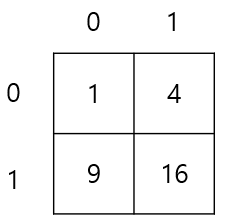